### Data & Dependancies

In [1]:
import tensorflow as tf
import pickle as pkl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

<input type="button" onclick="https://www.kaggle.com/datasets/vaibhavkumar11/hindi-english-parallel-corpus" value="DATASET" />

In [12]:
# read data
text = pd.read_csv('data/hindi_english_parallel.csv')

In [13]:
text.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default


### Data Preprocessing

In [14]:
text['english'] = text['english'].str.replace(pat=r'[^A-Za-z0-9]',repl=' ',regex=True).str.strip()

In [15]:
len(text)

1561841

In [16]:
text.dropna(inplace=True)

In [17]:
text

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default
...,...,...
1561835,Members making oath/affirmation,
1561836,स्पष्टीकरण.–जहां इस उपधारा के अधीन हानि और लाभ...,139 ...
1561837,मैंने गौर किया है कि यह न केवल अपने महत्त्वपूर...,I note that this is a landmark meeting not o...
1561838,उन्होंने मेरे समक्ष जो प्रदर्शन किया उसमें से ...,In the presentations that they made before me ...


In [18]:
text['english'].str.split(' ')

0          [Give, your, application, an, accessibility, w...
1                      [Accerciser, Accessibility, Explorer]
2          [The, default, plugin, layout, for, the, botto...
3          [The, default, plugin, layout, for, the, top, ...
4          [A, list, of, plugins, that, are, disabled, by...
                                 ...                        
1561835                                                   []
1561836    [139, , , , , , , , , , , , , , , , , , , , , ...
1561837    [I, note, that, this, is, a, landmark, meeting...
1561838    [In, the, presentations, that, they, made, bef...
1561839    [Issues, such, as, food, and, water, security,...
Name: english, Length: 1555574, dtype: object

In [19]:
text['english'] = text['english'].str.replace(pat='\s+',regex=True,repl=' ')

In [20]:
text[text['english'].str.split().str.len()==1]

,hindi,english
14,विधि,Method
15,गुणधर्म,Property
16,मान,Value
22,सभी,Everything
25,स्रोत,Source
...,...,...
1544348,तमिल।,Tamil
1544502,तेलुगू।,Telugu
1548341,वहां–,then
1558369,उर्दू।,Urdu


In [21]:
text.isna().sum()

hindi      0
english    0
dtype: int64

In [22]:
text[text['english'].str.isdigit()]

,hindi,english
1827,2number,2
1828,3number,3
1829,4number,4
1830,5number,5
1831,6number,6
...,...,...
1235767,९,9
1235768,९९,99
1239477,एक,1
1261743,शून्य,0


In [23]:
text[text['hindi'].str.contains(pat='[A-Za-z]',regex=True)]

,hindi,english
20,घटनाओं को मानिटर करें (_ M),Monitor Events
21,चुनाव को हटाएं (C _),C lear Selection
36,कार्रवाई (_ o),Acti on
59,छवि (_ I),Image
62,चयन (_ S),Selection
...,...,...
1561609,आप आरटीआई हैल्पडेस्क पर कॉल कर सकते हैं या अपन...,You may call the RTI helpdesk or send an e mai...
1561728,"अक्तूबर, 2015 में दिल्ली में आईएएफएस-III शिखर ...",Your participation in the IAFS III Summit in D...
1561753,अगस्त 2015 में भारत में अपनी राजकीय यात्रा] जि...,Your State Visit to India in August 2015 follo...
1561822,Y = धारा 143 की उपधारा (1) के खंड (क) के अधीन ...,Y the amount of tax calculated on the total in...


In [24]:
text['hindi'] = text['hindi'].str.replace(pat='[A-Za-z/]',repl='',regex=True)

In [25]:
text[text['hindi'].str.isdigit()]

,hindi,english
1827,2,2
1828,3,3
1829,4,4
1830,5,5
1831,6,6
...,...,...
1158081,3396,3396
1158085,4025,4025
1158087,4028,4028
1158102,1837,1837


In [26]:
text.drop(text[text['hindi'].str.isdigit()].index,inplace=True)

In [27]:
text.replace('',np.nan,inplace=True)

In [28]:
text.dropna(inplace=True)

In [29]:
text[text['english'].str.isdigit()]

,hindi,english
46705,50%,50
46706,75%,75
46707,100%,100
46708,125%,125
46709,150%,150
...,...,...
1235767,९,9
1235768,९९,99
1239477,एक,1
1261743,शून्य,0


In [30]:
text[text['hindi'].str.contains('%')]

,hindi,english
121,"% जिस पर कार्रवाई हो सकती है, वह न तो फोकस कर...",actionable s is not focusable or selectable
122,अंतर्क्रियात्मक% कार्रवाई करने योग्य नहीं है,interactive s is not actionable
124,% का कोई पाठ अंतराफलक नहीं है,s has no text interface
125,अभिभावक में% सूची शिशु सूची सेमेल नहीं खाती,s index in parent does not match child index
126,% संबंध के लिए अन्योन्य गायब है,Missing reciprocal for s relation
...,...,...
1559579,एक ही देश में हमारी अलग-अलग दुनिया है - जनसंख्...,We have different worlds in the same country t...
1559587,हमारे यहां वर्ष 2006-2007 में 9.4% की दर से वा...,We have had a real GDP growth of 9 4 for 2006 ...
1560782,जबकि हमारी सकल घरेलू उत्पाद (जी डी पी) विकास द...,While our GDP growth rate exceeds 9 our curren...
1560809,जबकि सकल घरेलू उत्पाद में कृषि क्षेत्र का हिस्...,While the current share of agriculture in GDP ...


In [31]:
text[text['hindi'].str.match("%")]

,hindi,english
121,"% जिस पर कार्रवाई हो सकती है, वह न तो फोकस कर...",actionable s is not focusable or selectable
124,% का कोई पाठ अंतराफलक नहीं है,s has no text interface
126,% संबंध के लिए अन्योन्य गायब है,Missing reciprocal for s relation
127,% गायब नाम या सूचक,s missing name or label
129,"% में% स्थिति है, पर उसके साथ% स्थिति नहीं है",s has s state without s state
...,...,...
242638,"% 1,% 2 पारिभाषित नहीं",1 2 not defined
242709,% 1,F11
242710,% 1,F10
1190988,% बदलाव की आवृत्ति,Frequency of variation


In [32]:
text['hindi'] = text['hindi'].str.replace(pat=r'^%',regex=True,repl='')

### Model Building

In [33]:
text_vec_layer_en = tf.keras.layers.TextVectorization(max_tokens=1000,
                                                      standardize='lower',
                                                      output_sequence_length=30)
text_vec_layer_hn = tf.keras.layers.TextVectorization(max_tokens=1000,
                                                      standardize=None,
                                                      output_sequence_length=30)

In [34]:
text_vec_layer_en.adapt(text['english'])
text_vec_layer_hn.adapt('<startseq> '+ text['hindi'] + " <endseq>")

In [38]:
vocab_size_en = len(text_vec_layer_en.get_vocabulary())

In [ ]:

keys, values = vectorize_layer._index_lookup_layer._table_handler.data()
return [x.decode('utf-8', errors='ignore') for _, x in sorted(zip(values, keys))]

In [35]:
vocab_size_hn = len(text_vec_layer_hn.get_vocabulary())
vocab_size_en = len(text_vec_layer_en.get_vocabulary())


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 6-7: unexpected end of data

In [218]:
text.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default


In [219]:
#text_vec_layer_en([['what is your name'],['my name is hallo world']])

In [220]:
# Sampling
text = text.sample(text.shape[0])

In [221]:
# Train data
X_train_dec = text.iloc[:1350481,0]
X_train_enc = text.iloc[:1350481,1]
y_train = text.iloc[:1350481,0]

# Validation data
X_val_dec = text.iloc[1350481:1450481,0]
X_val_enc = text.iloc[1350481:1450481,1]
y_val = text.iloc[1350481:1450481,0]

# Test data
X_test_dec = text.iloc[1450481:1500001,0]
X_test_enc = text.iloc[1450481:1500001,1]
y_test = text.iloc[1450481:1500001,0]


In [222]:
X_train_dec = '<startseq> ' + X_train_dec
X_val_dec = '<startseq> ' + X_val_dec

y_train += ' <endseq>'
y_val += ' <endseq>'

In [229]:
y_val = text_vec_layer_hn(y_val)
y_train = text_vec_layer_hn(y_train)

In [235]:
X_train_enc = tf.constant(X_train_enc)
X_val_enc = tf.constant(X_val_enc)

X_train_dec = tf.constant(X_train_dec)
X_val_dec = tf.constant(X_val_dec)

In [265]:
# Encoder
encoder_input = tf.keras.layers.Input(shape=(),dtype=tf.string)
encoder_input_ids = text_vec_layer_en(encoder_input)
encoder_embedding = tf.keras.layers.Embedding(vocab_size_en,128,mask_zero=True)(encoder_input_ids)
encoder_output, *encoder_states = tf.keras.layers.LSTM(units=128,return_state=True)(encoder_embedding)

# Decoder
decoder_input = tf.keras.layers.Input(shape=(),dtype=tf.string)
decoder_input_ids = text_vec_layer_hn(decoder_input)
decoder_embedding = tf.keras.layers.Embedding(vocab_size_hn,128,mask_zero=True)(decoder_input_ids)
decoder_lstm = tf.keras.layers.LSTM(128,return_sequences=True)(decoder_embedding, initial_state=encoder_states)
decoder_ff_layer = tf.keras.layers.Dense(128, activation='relu')(decoder_lstm)
decoder_output = tf.keras.layers.Dense(vocab_size_hn,activation='softmax')(decoder_ff_layer)

# Final Model Encoder-Decoder
model = tf.keras.Model(inputs=[encoder_input,decoder_input],outputs=decoder_output)

In [266]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [267]:
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35            │ (None)                 │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_36            │ (None)                 │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_6      │ (None, 30)             │              0 │ input_layer_35[0][0]   │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_7      │ (None, 30)             │              0 │ input_layer_36[0][0]   │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_35 (Embedding)  │ (None, 30, 128)        │        128,000 │ text_vectorization_6[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 30)             │              0 │ text_vectorization_6[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_36 (Embedding)  │ (None, 30, 128)        │        128,000 │ text_vectorization_7[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_34 (LSTM)            │ [(None, 128), (None,   │        131,584 │ embedding_35[0][0],    │
│                           │ 128), (None, 128)]     │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_35 (LSTM)            │ (None, 30, 128)        │        131,584 │ embedding_36[0][0],    │
│                           │                        │                │ lstm_34[0][1],         │
│                           │                        │                │ lstm_34[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_38 (Dense)          │ (None, 30, 128)        │         16,512 │ lstm_35[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 30, 1000)       │        129,000 │ dense_38[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 664,680 (2.54 MB)

 Trainable params: 664,680 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

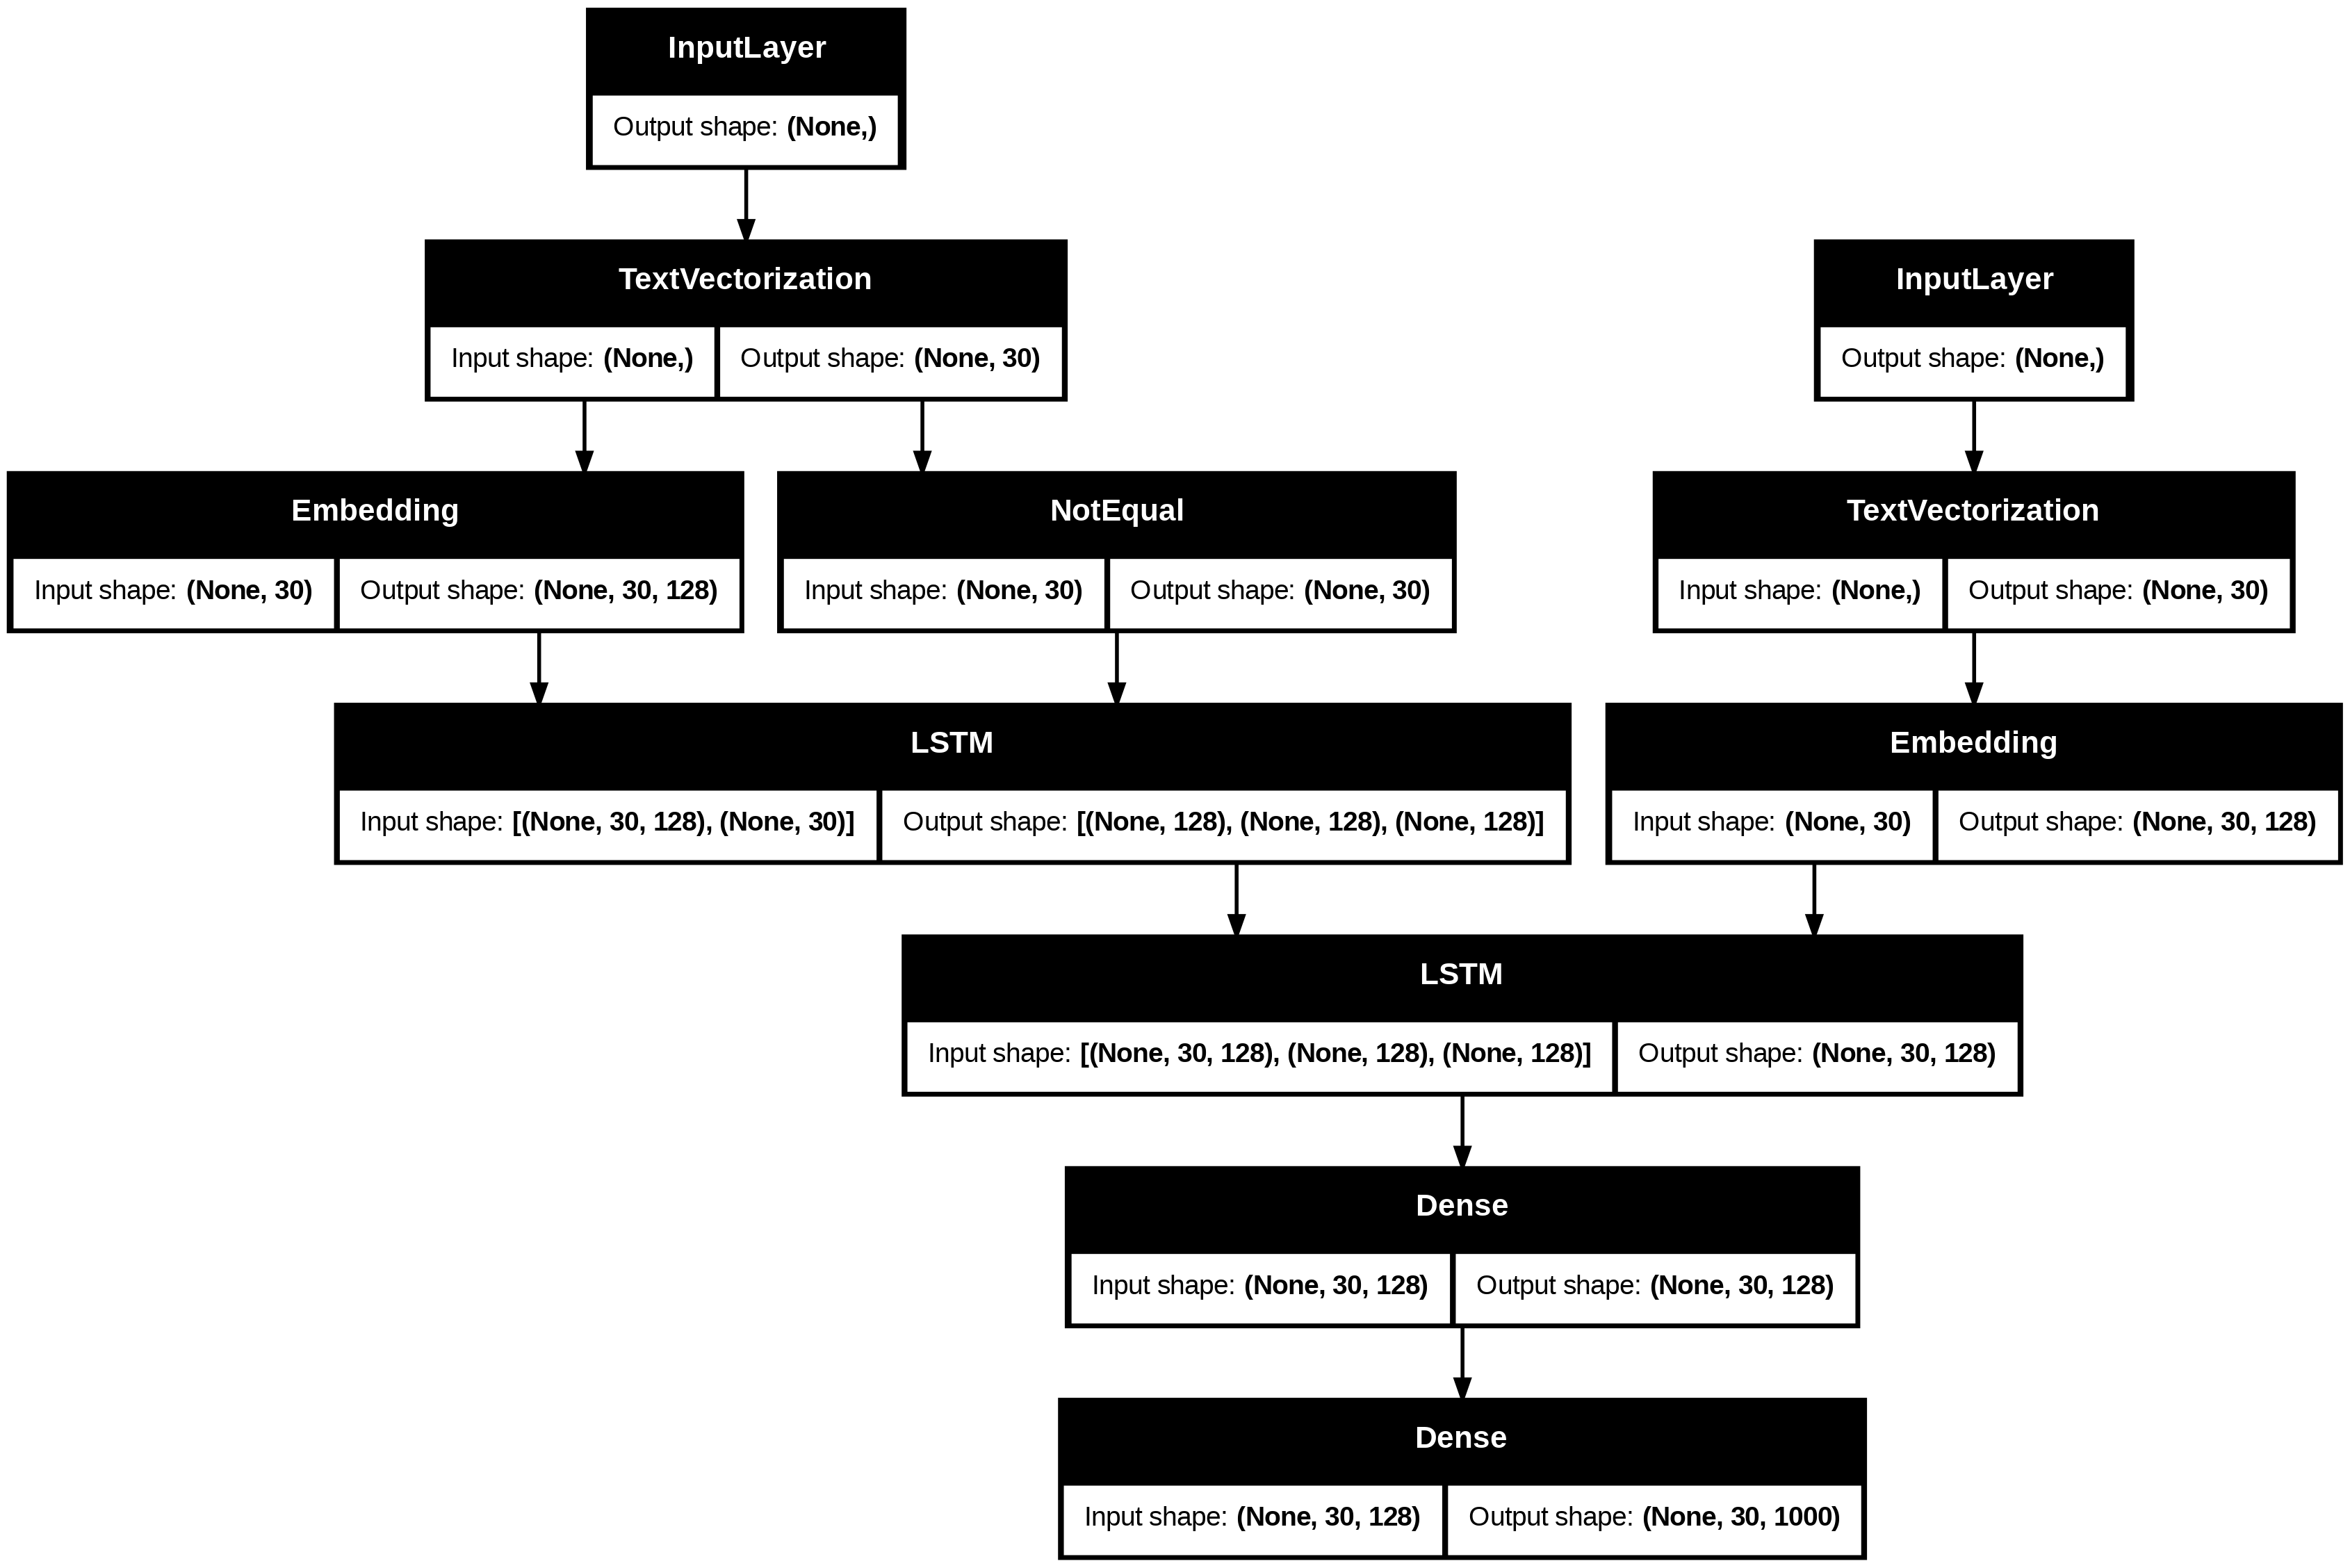

In [268]:
# Plot model

tf.keras.utils.plot_model(model,show_shapes=True)

In [269]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10,verbose=1)

In [ ]:
model.fit((X_train_enc,X_train_dec),y_train,
          epochs=100,
          callbacks=[early_stopping],
          validation_data=((X_val_enc,X_val_dec),y_val))

Epoch 1/100
42203/42203 ━━━━━━━━━━━━━━━━━━━━ 1589s 38ms/step - accuracy: 0.1760 - loss: 3.0412 - val_accuracy: 0.1922 - val_loss: 2.5200
Epoch 2/100
42203/42203 ━━━━━━━━━━━━━━━━━━━━ 1585s 38ms/step - accuracy: 0.1949 - loss: 2.4826 - val_accuracy: 0.1970 - val_loss: 2.4214
Epoch 3/100
42203/42203 ━━━━━━━━━━━━━━━━━━━━ 1584s 38ms/step - accuracy: 0.1995 - loss: 2.3939 - val_accuracy: 0.1997 - val_loss: 2.3776
Epoch 4/100
 6944/42203 ━━━━━━━━━━━━━━━━━━━━ 21:43 37ms/step - accuracy: 0.2023 - loss: 2.3550